## Additional plots of linear tuning model stats

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_font_size, get_line

CELL_FILE = 'data/christa/VLP_knownAUD_neurons_copiedFromFlyWireDatabase_20200617.xlsx'
# W_FILE = 'data/christa/allAudNeurons_connMat_noDupSyn.mat'
W_FILE = 'data/christa/allAudNeurons_connMat_noDupSyn_cleftFilt_20210603.mat'

# IPI_STATS_FILE = 'data/simple/cell_summary_ipi.csv'
# FREQ_STATS_FILE = 'data/simple/cell_summary_freq.csv'
STATS_FILE = 'plots/cb_ms/cell_tuning_model_table.csv'

FPS = 8.5

R = 0.67077, P = 1.0654835581258098e-40


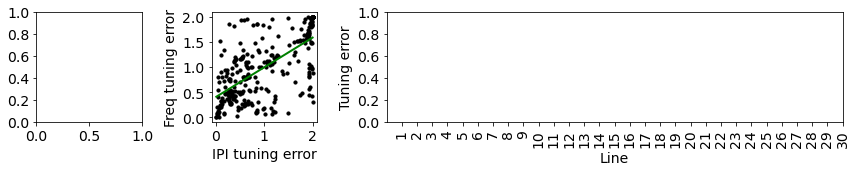

In [2]:
df_stats = pd.read_csv(STATS_FILE)

gs = gridspec.GridSpec(1, 5)
fig = plt.figure(figsize=(12, 2.5), tight_layout=True)
axs = np.array([fig.add_subplot(gs[0]), fig.add_subplot(gs[1]), fig.add_subplot(gs[2:])])

# ipi vs freq tuning error
ipi_tuning_err = df_stats['IPI_TUNING_ERROR_RMS']
freq_tuning_err = df_stats['FREQ_TUNING_ERROR_RMS']
x_ln, y_ln, (slp, icpt, r, p, std_err) = get_line(ipi_tuning_err, freq_tuning_err)

axs[1].scatter(ipi_tuning_err, freq_tuning_err, c='k', s=10)
axs[1].plot(x_ln, y_ln, c='g', lw=2)
axs[1].set_xlabel('IPI tuning error')
axs[1].set_ylabel('Freq tuning error')
print(f'R = {r:.5f}, P = {p}')

# ipi and freq tuning error vs # missing
# n_pre_without_ipi = df_ipi['N_PRE_WITHOUT_IPI']
# # axs[2].scatter(n_pre_without_ipi, ipi_tuning_err, c='b', s=10, marker='^')
# x_ln, y_ln, (slp, icpt, r, p, std_err) = get_line(n_pre_without_ipi, ipi_tuning_err)
# print('N_PRE_IPI vs ERROR correlation: ', r, p)

# n_pre_without_freq = df_freq['N_PRE_WITHOUT_FREQ']
# # axs[2].scatter(n_pre_without_freq, freq_tuning_err, c='g', s=10, marker='o')
# x_ln, y_ln, (slp, icpt, r, p, std_err) = get_line(n_pre_without_freq, freq_tuning_err)
# print('N_PRE_FREQ vs ERROR correlation: ', r, p)

# box/whisker plot of ipi and freq tuning error vs cell line
mean_err_ipi_vs_line = []
std_err_ipi_vs_line = []

mean_err_freq_vs_line = []
std_err_freq_vs_line = []

# for line in range(1, 31):
#     errs_ipi = df_stats[df_stats['LINE'] == line]['IPI_TUNING_ERROR_RMS']
#     mean_err_ipi_vs_line.append(np.nanmean(errs_ipi))
#     std_err_ipi_vs_line.append(np.nanstd(errs_ipi))

#     errs_freq = df_stats[df_stats['LINE'] == line]['FREQ_TUNING_ERROR_RMS']
#     mean_err_freq_vs_line.append(np.nanmean(errs_freq))
#     std_err_freq_vs_line.append(np.nanstd(errs_freq))
    
# axs[2].bar(range(1, 31), mean_err_ipi_vs_line, yerr=std_err_ipi_vs_line, width=-.4, align='edge', color='r')
# axs[2].bar(range(1, 31), mean_err_freq_vs_line, yerr=std_err_freq_vs_line, width=.4, align='edge', color='b')

axs[2].set_xticks(range(1, 31))
axs[2].set_xticklabels(range(1, 31), rotation=90)
    
axs[2].set_xlabel('Line')
axs[2].set_ylabel('Tuning error')

set_font_size(axs, 14)

# fig.savefig('plots/cb_ms/stats2.svg')